This notebook is for scraping all the **fatal plane accidents in China after 1949**. The dataset can be found in [Aviation Safety Network](https://aviation-safety.net/database/country/country.php?id=B).

## Import packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Get the table of page one

In [2]:
my_headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36"}

In [3]:
plane_html = requests.get("https://aviation-safety.net/database/dblist.php?Country=B", headers=my_headers).content
soup_doc = BeautifulSoup(plane_html, "html.parser")
#print(soup_doc.prettify())

In [4]:
all_rows = soup_doc.table.find_all('tr')
page_one = []
for row in all_rows[1:]:
    one_row = []
    cells = row.find_all('td')
    try:
        fatality = int(cells[4].string)
        if fatality > 0:
            one_row.append(cells[0].string)
            one_row.append(cells[1].string)
            one_row.append(cells[3].string)
            one_row.append(fatality)
            one_row.append(row.a['href'])
            page_one.append(one_row)
    except:
            one_row.append(cells[0].string)
            one_row.append(cells[1].string)
            one_row.append(cells[3].string)
            one_row.append(cells[4].string)
            one_row.append(row.a['href'])
            page_one.append(one_row)
page_one

[['21-MAR-2022',
  'Boeing 737-89P (WL)',
  'China Eastern',
  132,
  '/database/record.php?id=20220321-0'],
 ['01-MAR-2022',
  'Shaanxi Y-8',
  'China Air Force',
  7,
  '/database/record.php?id=20220301-0'],
 ['01-MAR-2021',
  'Beech B300 King Air 350i',
  'Beidahuang General Airlines, opf China Meteorological Administrat',
  5,
  '/database/record.php?id=20210301-0'],
 ['29-JAN-2018',
  'Shaanxi Y-8GX-3',
  'China Air Force',
  12,
  '/database/record.php?id=20180129-0'],
 ['20-JUL-2016',
  'Cessna 208B Grand Caravan EX',
  'Joy General Aviation',
  5,
  '/database/record.php?id=20160720-0'],
 ['06-AUG-2013',
  'Shijiazhuang Y-5B',
  'Jingmen General Aviation',
  1,
  '/database/record.php?id=20130806-0'],
 ['29-JUN-2012',
  'Embraer ERJ-190',
  'Tianjin Airlines',
  2,
  '/database/record.php?id=20120629-0'],
 ['28-MAR-2011',
  'Cessna 550 Citation II',
  'Zhong Fei General Aviation Co.',
  3,
  '/database/record.php?id=20110328-0'],
 ['24-AUG-2010',
  'Embraer ERJ-190',
  'Henan A

In [5]:
len(page_one)

46

In [6]:
df1 = pd.DataFrame(page_one, columns = ['data', 'type','operator','death','link'])

In [7]:
df1.head()

,data,type,operator,death,link
0,21-MAR-2022,Boeing 737-89P (WL),China Eastern,132,/database/record.php?id=20220321-0
1,01-MAR-2022,Shaanxi Y-8,China Air Force,7,/database/record.php?id=20220301-0
2,01-MAR-2021,Beech B300 King Air 350i,"Beidahuang General Airlines, opf China Meteoro...",5,/database/record.php?id=20210301-0
3,29-JAN-2018,Shaanxi Y-8GX-3,China Air Force,12,/database/record.php?id=20180129-0
4,20-JUL-2016,Cessna 208B Grand Caravan EX,Joy General Aviation,5,/database/record.php?id=20160720-0


In [8]:
df1.to_csv("page_one.csv",index=None)

## Get all the pages

In [9]:
page_num = range(2,7)

In [10]:
page_links = []
for num in page_num:
    link = "https://aviation-safety.net/database/dblist.php?Country=B&lang=&page=" + str(num)
    page_links.append(link)
page_links

['https://aviation-safety.net/database/dblist.php?Country=B&lang=&page=2',
 'https://aviation-safety.net/database/dblist.php?Country=B&lang=&page=3',
 'https://aviation-safety.net/database/dblist.php?Country=B&lang=&page=4',
 'https://aviation-safety.net/database/dblist.php?Country=B&lang=&page=5',
 'https://aviation-safety.net/database/dblist.php?Country=B&lang=&page=6']

In [11]:
all_pages = []
for page_link in page_links:
    plane_html = requests.get(page_link, headers=my_headers).content
    soup_doc = BeautifulSoup(plane_html, "html.parser")
    all_rows = soup_doc.table.find_all('tr')
    for row in all_rows[1:]:
        one_row = []
        cells = row.find_all('td')
        try:
            fatality = int(cells[4].string)
            if fatality > 0:
                one_row.append(cells[0].string)
                one_row.append(cells[1].string)
                one_row.append(cells[3].string)
                one_row.append(fatality)
                one_row.append(row.a['href'])
                all_pages.append(one_row)
        except:
                one_row.append(cells[0].string)
                one_row.append(cells[1].string)
                one_row.append(cells[3].string)
                one_row.append(cells[4].string)
                one_row.append(row.a['href'])
                all_pages.append(one_row)

In [12]:
len(all_pages)

357

In [13]:
df = pd.DataFrame(all_pages, columns = ['data', 'type','operator','death','link'])

In [14]:
frames = [df1, df]
result = pd.concat(frames)

In [15]:
result_clean = result.dropna()

In [16]:
len(result_clean)

157

In [17]:
result_clean.to_csv("all_page.csv",index=None)

## Get one detailed page

In [18]:
detail_html = requests.get("https://aviation-safety.net/database/record.php?id=20220321-0", headers=my_headers).content
detail_soup = BeautifulSoup(detail_html, "html.parser")

In [19]:
all_rows=detail_soup.find_all('tr')
keys = [row.find_all('td')[0].get_text() for row in all_rows]
values = [row.find_all('td')[1].get_text() for row in all_rows]
one_case = dict(zip(keys,values))
one_case

{'Status:': ' Information is only available from news or social media reports',
 'Date:': 'Monday 21 March 2022',
 'Time:': '06:22 UTC',
 'Type:': 'Boeing 737-89P (WL)',
 'Operator:': 'China Eastern Airlines',
 'Registration:': ' B-1791',
 'MSN:': ' 41474/5453',
 'First flight:': ' 2015-06-05  (6 years 10 months)',
 'Engines:': ' 2 CFMI CFM56-7B26E',
 'Crew:': 'Fatalities: 9 / Occupants: 9',
 'Passengers:': 'Fatalities: 123 / Occupants: 123',
 'Total:': 'Fatalities: 132 / Occupants: 132 ',
 'Aircraft damage:': ' Destroyed',
 'Aircraft fate:': ' Written off (damaged beyond repair)',
 'Location:': 'Tengxian, Guangxi ( \xa0 China) \r\n',
 'Phase:': ' En route (ENR)',
 'Nature:': 'Domestic Scheduled Passenger',
 'Departure airport:': 'Kunming Changshui International Airport (KMG/ZPPP), China',
 'Destination airport:': 'Guangzhou Baiyun International Airport (CAN/ZGGG), China',
 'Flightnumber:': 'MU5735',
 'ASN Home': 'Send Correction / Feedback',
 'FSF Home': 'Disclaimer',
 'Join FSF': 'Co

## Print out all detailed pages

In [20]:
df = pd.read_csv("all_page.csv")
df.head()

,data,type,operator,death,link
0,21-MAR-2022,Boeing 737-89P (WL),China Eastern,132,/database/record.php?id=20220321-0
1,01-MAR-2022,Shaanxi Y-8,China Air Force,7,/database/record.php?id=20220301-0
2,01-MAR-2021,Beech B300 King Air 350i,"Beidahuang General Airlines, opf China Meteoro...",5,/database/record.php?id=20210301-0
3,29-JAN-2018,Shaanxi Y-8GX-3,China Air Force,12,/database/record.php?id=20180129-0
4,20-JUL-2016,Cessna 208B Grand Caravan EX,Joy General Aviation,5,/database/record.php?id=20160720-0


In [ ]:
links = df.link.tolist()
new_links = []
for link in links:
    new_link = "https://aviation-safety.net" + link
    new_links.append(new_link)
#new_links

In [22]:
all_cases=[]
for link in new_links:
    html = requests.get(link, headers=my_headers).content
    soup = BeautifulSoup(html, "html.parser")
    all_rows=soup.find_all('tr')
    try:
        keys = [row.find_all('td')[0].get_text() for row in all_rows]
        keys.append('link')
        values = [row.find_all('td')[1].get_text() for row in all_rows]
        values.append(link)
        one_case = dict(zip(keys,values))
        all_cases.append(one_case)
    except:
        print(link)
all_cases

https://aviation-safety.net/database/record.php?id=20091128-0
https://aviation-safety.net/database/record.php?id=19990415-0


[{'Status:': ' Information is only available from news or social media reports',
  'Date:': 'Monday 21 March 2022',
  'Time:': '06:22 UTC',
  'Type:': 'Boeing 737-89P (WL)',
  'Operator:': 'China Eastern Airlines',
  'Registration:': ' B-1791',
  'MSN:': ' 41474/5453',
  'First flight:': ' 2015-06-05  (6 years 10 months)',
  'Engines:': ' 2 CFMI CFM56-7B26E',
  'Crew:': 'Fatalities: 9 / Occupants: 9',
  'Passengers:': 'Fatalities: 123 / Occupants: 123',
  'Total:': 'Fatalities: 132 / Occupants: 132 ',
  'Aircraft damage:': ' Destroyed',
  'Aircraft fate:': ' Written off (damaged beyond repair)',
  'Location:': 'Tengxian, Guangxi ( \xa0 China) \r\n',
  'Phase:': ' En route (ENR)',
  'Nature:': 'Domestic Scheduled Passenger',
  'Departure airport:': 'Kunming Changshui International Airport (KMG/ZPPP), China',
  'Destination airport:': 'Guangzhou Baiyun International Airport (CAN/ZGGG), China',
  'Flightnumber:': 'MU5735',
  'ASN Home': 'Send Correction / Feedback',
  'FSF Home': 'Disclai

In [23]:
len(all_cases)

155

In [24]:
detail_df = pd.DataFrame(all_cases)

In [25]:
detail_df

,Status:,Date:,Time:,Type:,Operator:,Registration:,MSN:,First flight:,Engines:,Crew:,...,Investigating agency:,Status:,Duration:,Accident number:,Download report:,Ground casualties:,Operating for:,Leased from:,Crash site elevation:,Collision casualties:
0,Information is only available from news or so...,Monday 21 March 2022,06:22 UTC,Boeing 737-89P (WL),China Eastern Airlines,B-1791,41474/5453,2015-06-05 (6 years 10 months),2 CFMI CFM56-7B26E,Fatalities: 9 / Occupants: 9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Little or no information is available,Tuesday 1 March 2022,NaN,Shaanxi Y-8,People's Liberation Army - Air Force - PLAAF,registration unknown,,,NaN,Fatalities: / Occupants:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Final,Monday 1 March 2021,15:19,Beechcraft B300 King Air 350i,Beidahuang General Airlines,B-10GD,FL-1014,2016,2 Pratt & Whitney Canada PT6A-60A,Fatalities: 2 / Occupants: 2,...,CAAC,Investigation completed,239 days (8 months),20210301TFSQ01,Final report\n,NaN,NaN,NaN,NaN,NaN
3,,Monday 29 January 2018,NaN,Shaanxi Y-8GX-3,People's Liberation Army - Air Force - PLAAF,30513,,,NaN,Fatalities: 5 / Occupants: 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Preliminary,Wednesday 20 July 2016,ca 12:20,Cessna 208B Grand Caravan EX,Joy General Aviation,B-10FW,208B5222,2015,1 Pratt & Whitney Canada PT6A-140,Fatalities: 1 / Occupants: 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,,Tuesday 29 October 1940,NaN,Douglas DC-2-221,China National Aviation Corporation - CNAC,39,1568,1937,NaN,Fatalities: 2 / Occupants: 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,,Sunday 12 March 1939,NaN,Junkers Ju-52/3mge,Eurasia,XXIII,4074,,NaN,Fatalities: 0 / Occupants: 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,,Wednesday 24 August 1938,NaN,Douglas DC-2-221,China National Aviation Corporation - CNAC,32,1568,1937,NaN,Fatalities: 1 / Occupants: 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,,Sunday 8 August 1937,NaN,Sikorsky S-43W,China National Aviation Corporation - CNAC,NC16930,4321,1936,NaN,Fatalities: 3 / Occupants: 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
detail_df.columns = detail_df.columns.str.strip().str.lower().str.replace(":","").str.replace(" ","_")

In [27]:
detail_df.to_csv("case_detail.csv",index=False)

## Manually clean up the csv and analyse

In [2]:
pd.set_option("display.max_columns", None)
df_clean = pd.read_csv("case_detail_clean.csv")
df_clean.head()

,status,date,time,type,operator,registration,msn,first_flight,engines,crew,passengers,total,aircraft_damage,aircraft_fate,location,phase,nature,departure_airport,destination_airport,flightnumber,link,total_airframe_hrs,cycles,ground_casualties,crash_site_elevation,collision_casualties
0,Information is only available from news or so...,Monday 21 March 2022,06:22 UTC,Boeing 737-89P (WL),China Eastern Airlines,B-1791,41474/5453,2015-06-05 (6 years 10 months),2 CFMI CFM56-7B26E,Fatalities: 9 / Occupants: 9,Fatalities: 123 / Occupants: 123,Fatalities: 132 / Occupants: 132,Destroyed,Written off (damaged beyond repair),"Tengxian, Guangxi ( China) \r\n",En route (ENR),Domestic Scheduled Passenger,Kunming Changshui International Airport (KMG/Z...,Guangzhou Baiyun International Airport (CAN/ZG...,MU5735,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN
1,Final,Monday 1 March 2021,15:19,Beechcraft B300 King Air 350i,Beidahuang General Airlines,B-10GD,FL-1014,2016,2 Pratt & Whitney Canada PT6A-60A,Fatalities: 2 / Occupants: 2,Fatalities: 3 / Occupants: 3,Fatalities: 5 / Occupants: 5,Destroyed,Written off (damaged beyond repair),"Shanghu, Ji'an County ( China) \r\n",En route (ENR),Agricultural,"Ganzhou Airport (KOW/ZSGZ), China","Ganzhou Airport (KOW/ZSGZ), China",NaN,https://aviation-safety.net/database/record.ph...,672.0,398.0,NaN,NaN,NaN
2,NaN,Monday 29 January 2018,NaN,Shaanxi Y-8GX-3,People's Liberation Army - Air Force - PLAAF,30513,,,NaN,Fatalities: 5 / Occupants: 5,Fatalities: 7 / Occupants: 7,Fatalities: 12 / Occupants: 12,Destroyed,Written off (damaged beyond repair),"Zhengchang, Suiyang County, Guizhou Province (...",En route (ENR),Military,?,?,NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN
3,Preliminary,Wednesday 20 July 2016,ca 12:20,Cessna 208B Grand Caravan EX,Joy General Aviation,B-10FW,208B5222,2015,1 Pratt & Whitney Canada PT6A-140,Fatalities: 1 / Occupants: 2,Fatalities: 4 / Occupants: 8,Fatalities: 5 / Occupants: 10,Damaged beyond repair,NaN,off Jinshan City Beach ( China) \r\n,Takeoff (TOF),Domestic Non Scheduled Passenger,"Jinshan City Beach Seaplane Base, China",?,NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN
4,Preliminary,Tuesday 6 August 2013,NaN,Shijiazhuang Y-5B,Jingmen General Aviation Co.,B-8473,101,1989,NaN,Fatalities: 1 / Occupants: 3,Fatalities: 0 / Occupants: 0,Fatalities: 1 / Occupants: 3,Damaged beyond repair,NaN,Danfeng County ( China) \r\n,Unknown (UNK),Agricultural,?,?,NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN


In [3]:
# change the date to datetime
df_clean.date = pd.to_datetime(df_clean.date)
# clean the location
df_clean['location_n']=df_clean.location.str.extract(r'(.*)[(]')

In [4]:
df_clean['location_n']

0                                 Tengxian, Guangxi 
1                             Shanghu, Ji'an County 
2      Zhengchang, Suiyang County, Guizhou Province 
3                            off Jinshan City Beach 
4                                    Danfeng County 
                           ...                      
148                                    near Changyi 
149                                    near Weining 
150                                        Wangmoon 
151                         Chilang Point, Bias Bay 
152                    near Beijing-Nanyuan Airport 
Name: location_n, Length: 153, dtype: object

In [32]:
df_clean['location_n'] = df_clean['location_n'].str.replace("near","")
df_clean['location_n'] = df_clean['location_n'].str.replace("off","")

In [33]:
df_clean['location_n'] 

0                                 Tengxian, Guangxi 
1                             Shanghu, Ji'an County 
2      Zhengchang, Suiyang County, Guizhou Province 
3                                Jinshan City Beach 
4                                    Danfeng County 
                           ...                      
148                                         Changyi 
149                                         Weining 
150                                        Wangmoon 
151                         Chilang Point, Bias Bay 
152                         Beijing-Nanyuan Airport 
Name: location_n, Length: 153, dtype: object

In [5]:
df_clean.nature.value_counts()

Military                             63
Domestic Scheduled Passenger         43
Cargo                                16
Domestic Non Scheduled Passenger      8
Passenger                             6
International Scheduled Passenger     4
Unknown                               4
Survey/research                       3
Agricultural                          2
Executive                             1
Training                              1
Int'l Non Scheduled Passenger         1
Ferry/positioning                     1
Name: nature, dtype: int64

In [6]:
pd.crosstab(df_clean.nature, df_clean.date.dt.year)

date,1922,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1952,1953,1954,1958,1961,1962,1963,1964,1973,1976,1979,1980,1982,1983,1985,1986,1988,1989,1990,1992,1993,1994,1996,1997,1999,2000,2001,2002,2004,2006,2008,2010,2011,2012,2013,2016,2018,2021,2022
nature,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agricultural,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
Cargo,0,0,0,0,0,1,0,4,4,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Domestic Non Scheduled Passenger,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Domestic Scheduled Passenger,0,0,1,1,1,0,1,0,0,0,4,3,2,0,0,0,0,1,0,0,1,0,0,1,0,1,2,1,1,1,1,2,2,1,3,1,1,2,1,2,0,1,1,0,0,1,0,1,0,0,0,0,1
Executive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ferry/positioning,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Int'l Non Scheduled Passenger,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
International Scheduled Passenger,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Military,0,0,0,0,0,0,0,8,15,19,4,4,1,0,1,3,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

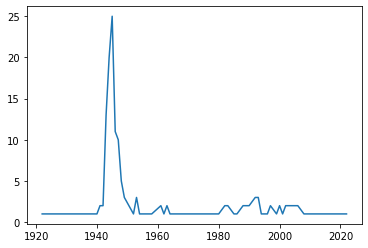

In [35]:
df_clean.date.dt.year.value_counts().sort_index().plot()

In [5]:
type_list = ['Domestic Scheduled Passenger','Domestic Non Scheduled Passenger','Passenger','International Scheduled Passenger',"Int'l Non Scheduled Passenger"]
df_cilver = df_clean[df_clean['nature'].isin(type_list)]

In [6]:
df_cilver

,status,date,time,type,operator,registration,msn,first_flight,engines,crew,passengers,total,aircraft_damage,aircraft_fate,location,phase,nature,departure_airport,destination_airport,flightnumber,link,total_airframe_hrs,cycles,ground_casualties,crash_site_elevation,collision_casualties,location_n
0,Information is only available from news or so...,2022-03-21,06:22 UTC,Boeing 737-89P (WL),China Eastern Airlines,B-1791,41474/5453,2015-06-05 (6 years 10 months),2 CFMI CFM56-7B26E,Fatalities: 9 / Occupants: 9,Fatalities: 123 / Occupants: 123,Fatalities: 132 / Occupants: 132,Destroyed,Written off (damaged beyond repair),"Tengxian, Guangxi ( China) \r\n",En route (ENR),Domestic Scheduled Passenger,Kunming Changshui International Airport (KMG/Z...,Guangzhou Baiyun International Airport (CAN/ZG...,MU5735,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,"Tengxian, Guangxi"
3,Preliminary,2016-07-20,ca 12:20,Cessna 208B Grand Caravan EX,Joy General Aviation,B-10FW,208B5222,2015,1 Pratt & Whitney Canada PT6A-140,Fatalities: 1 / Occupants: 2,Fatalities: 4 / Occupants: 8,Fatalities: 5 / Occupants: 10,Damaged beyond repair,NaN,off Jinshan City Beach ( China) \r\n,Takeoff (TOF),Domestic Non Scheduled Passenger,"Jinshan City Beach Seaplane Base, China",?,NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,off Jinshan City Beach
5,NaN,2012-06-29,12:35,Embraer ERJ 190-100 LR (ERJ-190LR),Tianjin Airlines,B-3171,19000379,2010,2 General Electric CF34-10E5,Fatalities: 0 / Occupants: 9,Fatalities: 2 / Occupants: 92,Fatalities: 2 / Occupants: 101,None,NaN,Hotan Airport (HTN) ( China) \r\n,En route (ENR),Domestic Scheduled Passenger,"Hotan Airport (HTN/ZWTN), China","Urumqi Airport (URC/ZWWW), China",GS7554,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,Hotan Airport (HTN)
7,Final,2010-08-24,21:38,Embraer ERJ 190-100 LR (ERJ-190LR),Henan Airlines,B-3130,19000223,2008,2 General Electric CF34-10E5,Fatalities: / Occupants: 5,Fatalities: / Occupants: 91,Fatalities: 44 / Occupants: 96,Destroyed,Written off (damaged beyond repair),"0,9 km (0.6 mls) E of Yichun Lindu Airport (LD...",Landing (LDG),Domestic Scheduled Passenger,Harbin-Taiping International Airport (HRB/ZYHB...,"Yichun Lindu Airport (LDS/ZYLD), China",VD8387,https://aviation-safety.net/database/record.ph...,5109.0,4712.0,NaN,NaN,NaN,"0,9 km (0.6 mls) E of Yichun Lindu Airport (LDS)"
11,Preliminary,2004-11-21,08:20,Canadair CL-600-2B19 Regional Jet CRJ-200LR,China Yunnan Airlines,B-3072,7697,2002,2 General Electric CF34-3B1,Fatalities: 6 / Occupants: 6,Fatalities: 47 / Occupants: 47,Fatalities: 53 / Occupants: 53,Destroyed,Written off (damaged beyond repair),near Baotou Airport (BAV) ( China) \r\n,Initial climb (ICL),Domestic Scheduled Passenger,"Baotou Airport (BAV/ZBOW), China","Shanghai-Hongqiao Airport (SHA/ZSSS), China",5210,https://aviation-safety.net/database/record.ph...,NaN,NaN,Fatalities: 2,NaN,NaN,near Baotou Airport (BAV)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,NaN,1940-10-29,NaN,Douglas DC-2-221,China National Aviation Corporation - CNAC,39,1568,1937,NaN,Fatalities: 2 / Occupants: 4,Fatalities: 7 / Occupants: 10,Fatalities: 9 / Occupants: 14,Destroyed,Written off (damaged beyond repair),near Changyi ( China) \r\n,Taxi (TXI),Domestic Scheduled Passenger,Chongqing-Jiangbei International Airport (CKG/...,"Kunming-Wujiaba Airfield (KMG/ZPPP), China",NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,near Changyi
149,NaN,1939-03-12,NaN,Junkers Ju-52/3mge,Eurasia,XXIII,4074,,NaN,Fatalities: 0 / Occupants: 2,Fatalities: 4 / Occupants: 4,Fatalities: 4 / Occupants: 6,Damaged beyond repair,NaN,near Weining ( China) \r\n,En route (ENR),Domestic Scheduled Passenger,Chongqing-Jiangbei International Airport (CKG/...,"Kunming-Wujiaba Airfield (KMG/ZPPP), China",NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,near 

In [10]:
df_cilver.date.dt.year.value_counts().sort_index()

1922    1
1937    1
1938    1
1939    1
1940    1
1941    1
1942    1
1943    1
1944    1
1945    1
1946    6
1947    3
1948    4
1949    2
1954    1
1958    1
1961    1
1963    1
1973    1
1976    1
1980    1
1982    2
1983    1
1985    1
1986    1
1988    2
1989    2
1990    2
1992    3
1993    3
1994    1
1996    1
1997    2
1999    1
2000    2
2002    1
2004    1
2010    1
2012    1
2016    1
2022    1
Name: date, dtype: int64

In [14]:
df_cilver[df_cilver.date.dt.year==1946]

,status,date,time,type,operator,registration,msn,first_flight,engines,crew,passengers,total,aircraft_damage,aircraft_fate,location,phase,nature,departure_airport,destination_airport,flightnumber,link,total_airframe_hrs,cycles,ground_casualties,crash_site_elevation,collision_casualties,location_n
75,NaN,1946-12-25,NaN,Douglas C-47 (DC-3),Central Air Transport,48,,,NaN,Fatalities: 4 / Occupants: 4,Fatalities: 7 / Occupants: 7,Fatalities: 11 / Occupants: 11,Damaged beyond repair,NaN,3 km (1.9 mls) N of Shanghai-Jiangwan Airport ...,Approach (APR),Domestic Scheduled Passenger,Chongqing-Jiangbei International Airport (CKG/...,"Shanghai-Jiangwan Airport, China",NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,Fatalities: 1,NaN,NaN,3 km (1.9 mls) N of Shanghai-Jiangwan Airport
76,NaN,1946-12-25,ca 22:00,Curtiss C-46 Commando,China National Aviation Corporation - CNAC,115,,,NaN,Fatalities: 1 / Occupants: 3,Fatalities: 30 / Occupants: 33,Fatalities: 31 / Occupants: 36,Damaged beyond repair,NaN,Shanghai-Longhua Airport ( China) \r\n,Approach (APR),Domestic Scheduled Passenger,Chongqing-Jiangbei International Airport (CKG/...,"Shanghai/Longhua (ZSSL), China",NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,Shanghai-Longhua Airport
77,NaN,1946-12-25,ca 20:00,Douglas C-47 (DC-3),China National Aviation Corporation - CNAC,140,,,NaN,Fatalities: 2 / Occupants: 3,Fatalities: 17 / Occupants: 27,Fatalities: 19 / Occupants: 30,Damaged beyond repair,NaN,Shanghai-Jiangwan Airport ( China) \r\n,Approach (APR),Domestic Scheduled Passenger,Chongqing-Jiangbei International Airport (CKG/...,"Shanghai-Jiangwan Airport, China",NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,Shanghai-Jiangwan Airport
79,NaN,1946-09-20,NaN,unknown,China National Aviation Corporation - CNAC,registration unknown,,,NaN,Fatalities: 3 / Occupants: 3,Fatalities: 28 / Occupants: 28,Fatalities: 31 / Occupants: 31,Damaged beyond repair,NaN,"near Xichang, Sichuan Province ( China) \r\n",En route (ENR),Passenger,"Xichang Airport (XIC/ZUXC), China",?,NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,"near Xichang, Sichuan Province"
80,NaN,1946-07-13,NaN,Curtiss C-46 Commando,Central Air Transport,registration unknown,,,NaN,Fatalities: 2 / Occupants:,Fatalities: 11 / Occupants:,Fatalities: 13 / Occupants: 49,Damaged beyond repair,NaN,"1,6 km (1 mls) from Jinan Airport (TNA) ( C...",Initial climb (ICL),Domestic Scheduled Passenger,"Jinan Airport (TNA/ZSTN), China",?,NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,"1,6 km (1 mls) from Jinan Airport (TNA)"
81,NaN,1946-04-08,NaN,Douglas C-47B-1-DL (DC-3),United States Army Air Force - USAAF,43-16360,20826,1944,2 Pratt & Whitney R-1830-90C,Fatalities: 4 / Occupants: 4,Fatalities: 13 / Occupants: 13,Fatalities: 17 / Occupants: 17,Damaged beyond repair,NaN,near Shensi ( China) \r\n,En route (ENR),Passenger,Chongqing-Jiangbei International Airport (CKG/...,"Yan'an Ershilipu Airport (ENY/ZLYA), China",NaN,https://aviation-safety.net/database/record.ph...,NaN,NaN,NaN,NaN,NaN,near Shensi


<AxesSubplot:>

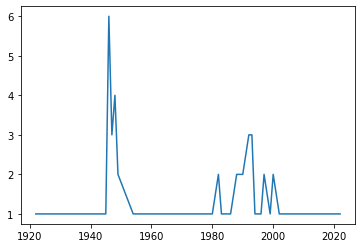

In [12]:
df_cilver.date.dt.year.value_counts().sort_index().plot()

## Try to get the geocode

In [39]:
api_key = 'W9VVaq6bt3b-4vPHxtsrNPziDHzxrpTAHvjErbH4Gqk'

In [40]:
from tqdm.auto import tqdm
tqdm.pandas()
def geocode(address):
    params = {
        'q': address,
        'apikey': api_key
    }
    response = requests.get('https://geocode.search.hereapi.com/v1/geocode', params=params)
    data = response.json()
    if len(data['items']) > 0:
        match = data['items'][0]
        result = {
            'place': address,
            'lat': match['position']['lat'],
            'lng': match['position']['lng']
        }
        return pd.Series(result)
    else:
        result = {
            'place': address,
            'lat': 'NaN',
            'lng': 'NaN'
        }
        return pd.Series(result)

##### Finally I decide to do it manually, since there are so many mistakes in the returned geocode. I am almost blind!

In [81]:
geocoded_clean = pd.read_csv("geocode_passenger.csv")
geocoded_clean = geocoded_clean[['place','lat','lng']].rename(columns={"place": "location_n"})
df_passenger = pd.merge(df_cilver, geocoded_clean, on=['location_n']).drop_duplicates()

In [82]:
df_passenger.total = df_passenger.total.str.replace("Fatalities:","").str.replace("Occupants:","")
df_passenger[["fatilities","nothing","occupants"]] = df_passenger.total.str.split(expand=True)

In [83]:
df_passenger.to_csv("passenger_final.csv",index=False)

In [84]:
df_passenger['year']=df_passenger.date.dt.year
df_passenger.fatilities = df_passenger.fatilities.astype('int32')

In [85]:
df_passenger[["year","fatilities","lat","lng"]].to_csv("selected.csv",index=False)

In [148]:
df_passenger[df_passenger['fatilities'] > 140]

,status,date,time,type,operator,registration,msn,first_flight,engines,crew,passengers,total,aircraft_damage,aircraft_fate,location,phase,nature,departure_airport,destination_airport,flightnumber,link,total_airframe_hrs,cycles,ground_casualties,crash_site_elevation,collision_casualties,location_n,country,lat,lng,fatilities,nothing,occupants,year
12,NaN,1994-06-06,08:22,Tupolev Tu-154M,China Northwest Airlines,B-2610,86A740,1986,3 Soloviev D-30KU-154-II,Fatalities: 14 / Occupants: 14,Fatalities: 146 / Occupants: 146,160 / 160,Destroyed,Written off (damaged beyond repair),29 km (18.1 mls) SE of Xian-Xianyang Internati...,En route (ENR),Domestic Scheduled Passenger,Xian-Xianyang International Airport (XIY/ZLXY)...,"Guangzhou-Baiyun Airport (CAN/ZGGG), China",WH2303,https://aviation-safety.net/database/record.ph...,12507.0,6651.0,NaN,NaN,NaN,29 km (18.1 mls) SE of Xian-Xianyang Internati...,China,34.437111,108.757329,160,/,160,1994
19,NaN,1992-11-24,07:52,Boeing 737-3Y0,China Southern Airlines,B-2523,24913/2052,1991-05-10 (1 year 7 months),2 CFMI CFM56-3B1,Fatalities: 10 / Occupants: 10,Fatalities: 131 / Occupants: 131,141 / 141,Destroyed,Written off (damaged beyond repair),20 km (12.5 mls) S of Guilin Airport (KWL) ( ...,Approach (APR),Domestic Non Scheduled Passenger,"Guangzhou-Baiyun Airport (CAN/ZGGG), China","Guilin-Qifengling Airport (KWL/ZGKL), China",CZ3943,https://aviation-safety.net/database/record.ph...,4165.0,3153.0,NaN,NaN,NaN,20 km (12.5 mls) S of Guilin Airport (KWL),China,25.273610,110.290020,141,/,141,1992


In [86]:
geo = pd.read_csv("selected.csv")

In [87]:
geo.shape

(62, 4)

## Fatality analysis

In [11]:
passenger = pd.read_csv("passenger_final.csv")
passenger.date = pd.to_datetime(passenger.date)

In [14]:
passenger.dtypes

status                          object
date                    datetime64[ns]
time                            object
type                            object
operator                        object
registration                    object
msn                             object
first_flight                    object
engines                         object
crew                            object
passengers                      object
total                           object
aircraft_damage                 object
aircraft_fate                   object
location                        object
phase                           object
nature                          object
departure_airport               object
destination_airport             object
flightnumber                    object
link                            object
total_airframe_hrs             float64
cycles                         float64
ground_casualties               object
crash_site_elevation            object
collision_casualties     

In [41]:
df = passenger[['date','fatilities','occupants']]
df['year'] = df.resample('10A')
df.head()

/var/folders/9m/w7ffkstj051dnyjnyklwvwmr0000gn/T/ipykernel_54424/2147470241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.dt.year


,date,fatilities,occupants,year
0,2022-03-21,132,132.0,2022
1,2016-07-20,5,10.0,2016
2,2012-06-29,2,101.0,2012
3,2010-08-24,44,96.0,2010
4,2004-11-21,53,53.0,2004


In [53]:
df2 = df.resample('5A', on='date').sum().reset_index()
df2['survive']=df2['occupants']-df2['fatilities']
df2[['date','fatilities','survive']].to_csv("stackbar.csv",index=False)